In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout,BatchNormalization,Conv2D


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

%matplotlib inline 

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

### **Display the Pixels**

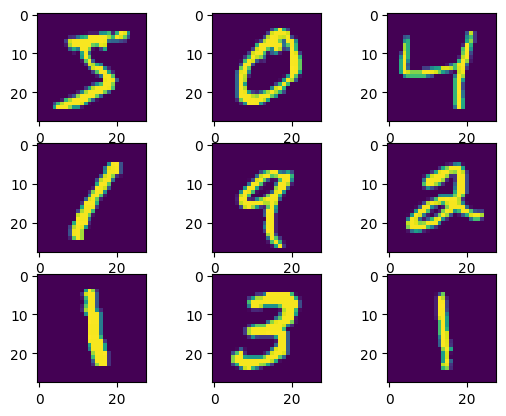

In [ ]:
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

**Flatten and Normalize the pixels**

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28*28);
X_test = X_test.reshape(X_test.shape[0],28*28);

X_train = X_train/255
X_test = X_test/255

**Training using KNN algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
dt_acc_score = accuracy_score(y_test, y_pred)
print('\n')
print("Accuracy of KNNClassifier:",dt_acc_score*100,'\n')

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.94      1.00      0.97      1135
           2       0.98      0.95      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 972    1    1    0    0    2    3    1    0    0]
 [   0 1132    2    0    0    0    1    0    0    0]
 [  13   12  982    2    1    0    2   17    3    0]
 [   0    3    3  976    1   10    1    7    6    3]
 [   2   11    0    0  940   

**MNIST using Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
dt_acc_score = accuracy_score(y_test, y_pred)
print('\n')
print("Accuracy of RandomForestClassifier:",dt_acc_score*100,'\n')

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 968    1    0    0    0    4    4    1    2    0]
 [   0 1122    4    2    0    3    2    1    1    0]
 [   6    0  999    5    2    1    4   10    5    0]
 [   1    0   10  965    0    9    1   11   10    3]
 [   1    0    1    0  952   

**Classification using ANN**

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
X_train = X_train.reshape([X_train.shape[0],28,28])
X_test = X_test.reshape([X_test.shape[0],28,28])
X_train.shape,X_test.shape, y_train.shape, y_test.shape


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
history = model.fit(X_train,y_train,batch_size=100,epochs=25,verbose=1,validation_split=0.2)

Epoch 1/25
480/480 [==============================] - 10s 7ms/step - loss: 0.3829 - accuracy: 0.8902 - val_loss: 0.1832 - val_accuracy: 0.9486
Epoch 2/25
480/480 [==============================] - 3s 6ms/step - loss: 0.1607 - accuracy: 0.9531 - val_loss: 0.1444 - val_accuracy: 0.9567
Epoch 3/25
480/480 [==============================] - 4s 8ms/step - loss: 0.1154 - accuracy: 0.9656 - val_loss: 0.1247 - val_accuracy: 0.9625
Epoch 4/25
480/480 [==============================] - 3s 6ms/step - loss: 0.0868 - accuracy: 0.9743 - val_loss: 0.1163 - val_accuracy: 0.9642
Epoch 5/25
480/480 [==============================] - 3s 6ms/step - loss: 0.0713 - accuracy: 0.9788 - val_loss: 0.1076 - val_accuracy: 0.9679
Epoch 6/25
480/480 [==============================] - 2s 5ms/step - loss: 0.0584 - accuracy: 0.9827 - val_loss: 0.1004 - val_accuracy: 0.9713
Epoch 7/25
480/480 [==============================] - 2s 4ms/step - loss: 0.0459 - accuracy: 0.9865 - val_loss: 0.0993 - val_accuracy: 0.9707
Epoch

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
dt_acc_score = accuracy_score(y_test, y_pred)
print('\n')
print("Accuracy of ANN:",dt_acc_score*100,'\n')

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.97      0.96       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 970    1    1    1    0    3    1    2    1    0]
 [   0 1125    1    0    0    2    3    1    3    0]
 [   3    5  995    6    2    0    2    5   14    0]
 [   0    1    1  991    0    5    0    3    6    3]
 [   1    1    8    1  960   

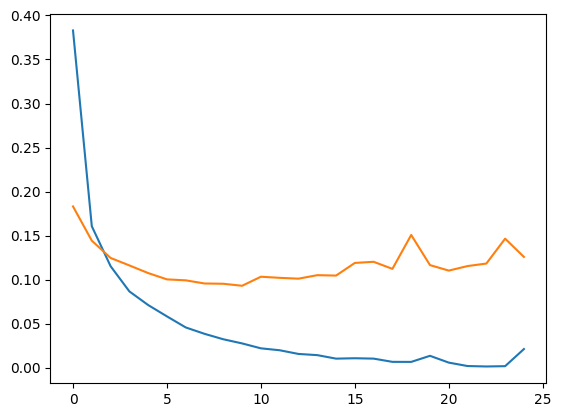

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

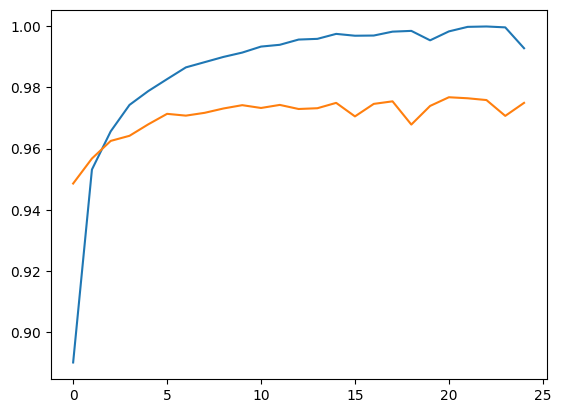

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


## **Proposed CNN Model**

In [ ]:
model=Sequential()

   
model.add(Conv2D(filters=64, kernel_size = (3,3), activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(filters=128, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())   
model.add(Dropout(0.4)) 

model.add(Conv2D(filters=256, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size = (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
    
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
    
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       7

In [ ]:
history = model.fit(X_train,y_train,batch_size=128,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 51s 82ms/step - loss: 0.4355 - accuracy: 0.9011 - val_loss: 0.1536 - val_accuracy: 0.9740
Epoch 2/100
375/375 [==============================] - 30s 80ms/step - loss: 0.1528 - accuracy: 0.9650 - val_loss: 0.0971 - val_accuracy: 0.9814
Epoch 3/100
375/375 [==============================] - 31s 82ms/step - loss: 0.1113 - accuracy: 0.9734 - val_loss: 0.0526 - val_accuracy: 0.9865
Epoch 4/100
375/375 [==============================] - 31s 82ms/step - loss: 0.0783 - accuracy: 0.9801 - val_loss: 0.0483 - val_accuracy: 0.9887
Epoch 5/100
375/375 [==============================] - 31s 82ms/step - loss: 0.0699 - accuracy: 0.9822 - val_loss: 0.0629 - val_accuracy: 0.9862
Epoch 6/100
375/375 [==============================] - 30s 79ms/step - loss: 0.0624 - accuracy: 0.9838 - val_loss: 0.0611 - val_accuracy: 0.9852
Epoch 7/100
375/375 [==============================] - 30s 79ms/step - loss: 0.0558 - accuracy: 0.9861 - val_loss: 0.0570 - val_ac

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

313/313 [==============================] - 2s 5ms/step


In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
dt_acc_score = accuracy_score(y_test, y_pred)
print('\n')
print("Accuracy of CNN:",dt_acc_score*100,'\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      1.00      1.00       982
           5       0.99      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      1.00      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    0    0    0    0    0    1    2    1    0]
 [   0 1131    0    0    0    0    2    2    0    0]
 [   0    0 1028    0    0    0    0    4    0    0]
 [   0    1    1 1001    0    6    0    1    0    0]
 [   0    0    0    0  978   

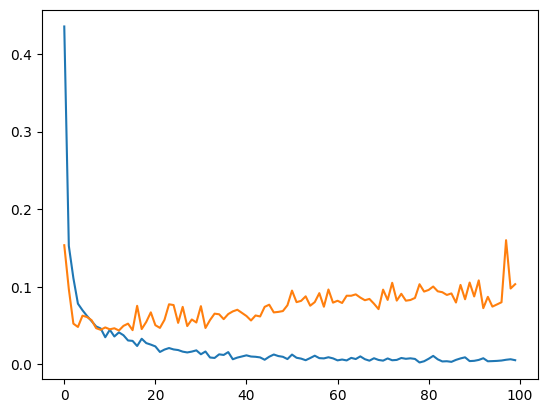

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

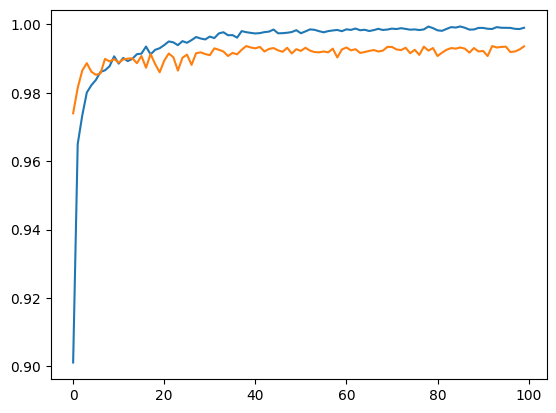

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


(91.65, 100.31)

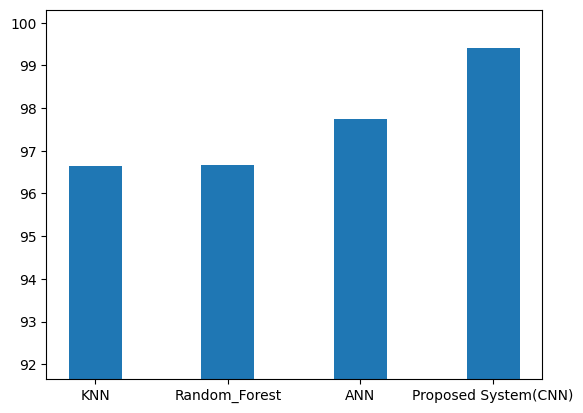

In [ ]:
data = {'KNN':96.65,'Random_Forest':96.67,'ANN':97.74,'Proposed System(CNN)':99.41}
plt.bar(data.keys(),data.values(),width=0.4)
max_y_lim = max(data.values()) + .9
min_y_lim = min(data.values())-5
plt.ylim(min_y_lim, max_y_lim)